In [2]:
# Use this code to generate a specified number of transcripts using a customized user prompt.
# :param output_dir                 - The output directory for generated scripts.
# :param quantity                   - The number of generated transcripts.
# :param user_prompt_gen_transcript - The user prompt for tune to generated transcript responses.

from tsdiscovery.transcripts import Transcripts
from tsdiscovery.openaiwrap import OpenAiWrap

from dotenv import load_dotenv
import os
from pathlib import Path

import logging.config

prj_root = os.getcwd() + '/..'

conf_dir = f"{prj_root}/conf"
env_conf = f"{conf_dir}/dev.env"

logger_conf = f"{conf_dir}/logging.conf"
logger_name = 'mainLogger'

logging.config.fileConfig(logger_conf)
log = logging.getLogger(logger_name)

env_path = Path(env_conf)
load_dotenv(dotenv_path=env_path)

# User Input Variables.
output_dir = f"{prj_root}/output/t5"
quantity = 500
user_prompt_gen_transcript = """The transcript should be of an executive assistant receiving calls for 
their executive and needing to schedule a follow-up at a later date.  Randomly decide on a date and time and how many 
turns it takes to book the appointment.  Randomly decide on people names, but make sure to use diverse names.  Don't 
use the words "my executive" or "your executive" or similar expressions.  Randomly decide on the reason the executive 
is unavailable.  Don't use an executive service as a business."""


openai_api_key = os.getenv('OPENAI_API_KEY')
openai_org = os.getenv('OPENAI_ORG')
openai_client = OpenAiWrap(
    openai_org,
    openai_api_key
)

tss = Transcripts(openai_client)

tss.gen_agent_transcripts(
    user_prompt=user_prompt_gen_transcript,
    quantity=quantity,
    output_dir=output_dir
)


2023-12-19 23:36:34 - openAiLogger - INFO - d23f8dea-f67e-4358-949b-c39024778318 | CreateCompletions | Input: {'user_prompt': 490, 'sys_prompt': 247, 'model': 'gpt-4-1106-preview'}
2023-12-19 23:36:50 - openAiLogger - INFO - d23f8dea-f67e-4358-949b-c39024778318 | CreateCompletions | Output: {'id': 'chatcmpl-8Xibqr5fBPI5T9f9pZZKkIwzOSJxs', 'system_fingerprint': 'fp_3905aa4f79', 'finish_reason': 'stop', 'completion_tokens': 283, 'prompt_tokens': 175, 'total_tokens': 458, 'exec_time': 15.558500051498413}
2023-12-19 23:36:50 - openAiLogger - INFO - 4dd60fda-09a0-4f5b-8983-34cfd0918c27 | CreateCompletions | Input: {'user_prompt': 490, 'sys_prompt': 247, 'model': 'gpt-4-1106-preview'}
2023-12-19 23:37:09 - openAiLogger - INFO - 4dd60fda-09a0-4f5b-8983-34cfd0918c27 | CreateCompletions | Output: {'id': 'chatcmpl-8Xic5hFqqbpLJ7HVGlYAKN7CAdppx', 'system_fingerprint': 'fp_3905aa4f79', 'finish_reason': 'stop', 'completion_tokens': 274, 'prompt_tokens': 175, 'total_tokens': 449, 'exec_time': 19.415

In [2]:
from tsdiscovery.transcripts import Transcripts
import os
prj_root = os.getcwd() + '/..'

Transcripts.process_transcript_to_csv(f"{prj_root}/output/t1/transcript0.txt")

True

Batches:   0%|          | 0/285 [00:00<?, ?it/s]

Silhouette Score: 0.31
2023-12-22 20:21:30 - openAiLogger - INFO - 4a7f75c7-e5e3-449b-958b-3a0c86e59f01 | CreateCompletions | Input: {'user_prompt': 2972, 'sys_prompt': 87, 'model': 'gpt-4-1106-preview'}
2023-12-22 20:21:30 - openAiLogger - INFO - 4a7f75c7-e5e3-449b-958b-3a0c86e59f01 | CreateCompletions | Output: {'id': 'chatcmpl-8Ykzif5tt15BFEb4cJAX5Yw83qUCB', 'system_fingerprint': 'fp_3905aa4f79', 'finish_reason': 'stop', 'completion_tokens': 3, 'prompt_tokens': 826, 'total_tokens': 829, 'exec_time': 0.7548301219940186}
2023-12-22 20:21:30 - openAiLogger - INFO - e4e8d9d5-f751-4ad8-9b7a-b8f71bc4c897 | CreateCompletions | Input: {'user_prompt': 4252, 'sys_prompt': 87, 'model': 'gpt-4-1106-preview'}
2023-12-22 20:21:32 - openAiLogger - INFO - e4e8d9d5-f751-4ad8-9b7a-b8f71bc4c897 | CreateCompletions | Output: {'id': 'chatcmpl-8YkzjCQz12xewtcucG2TcgAyqfNXP', 'system_fingerprint': 'fp_3905aa4f79', 'finish_reason': 'stop', 'completion_tokens': 4, 'prompt_tokens': 890, 'total_tokens': 894, 

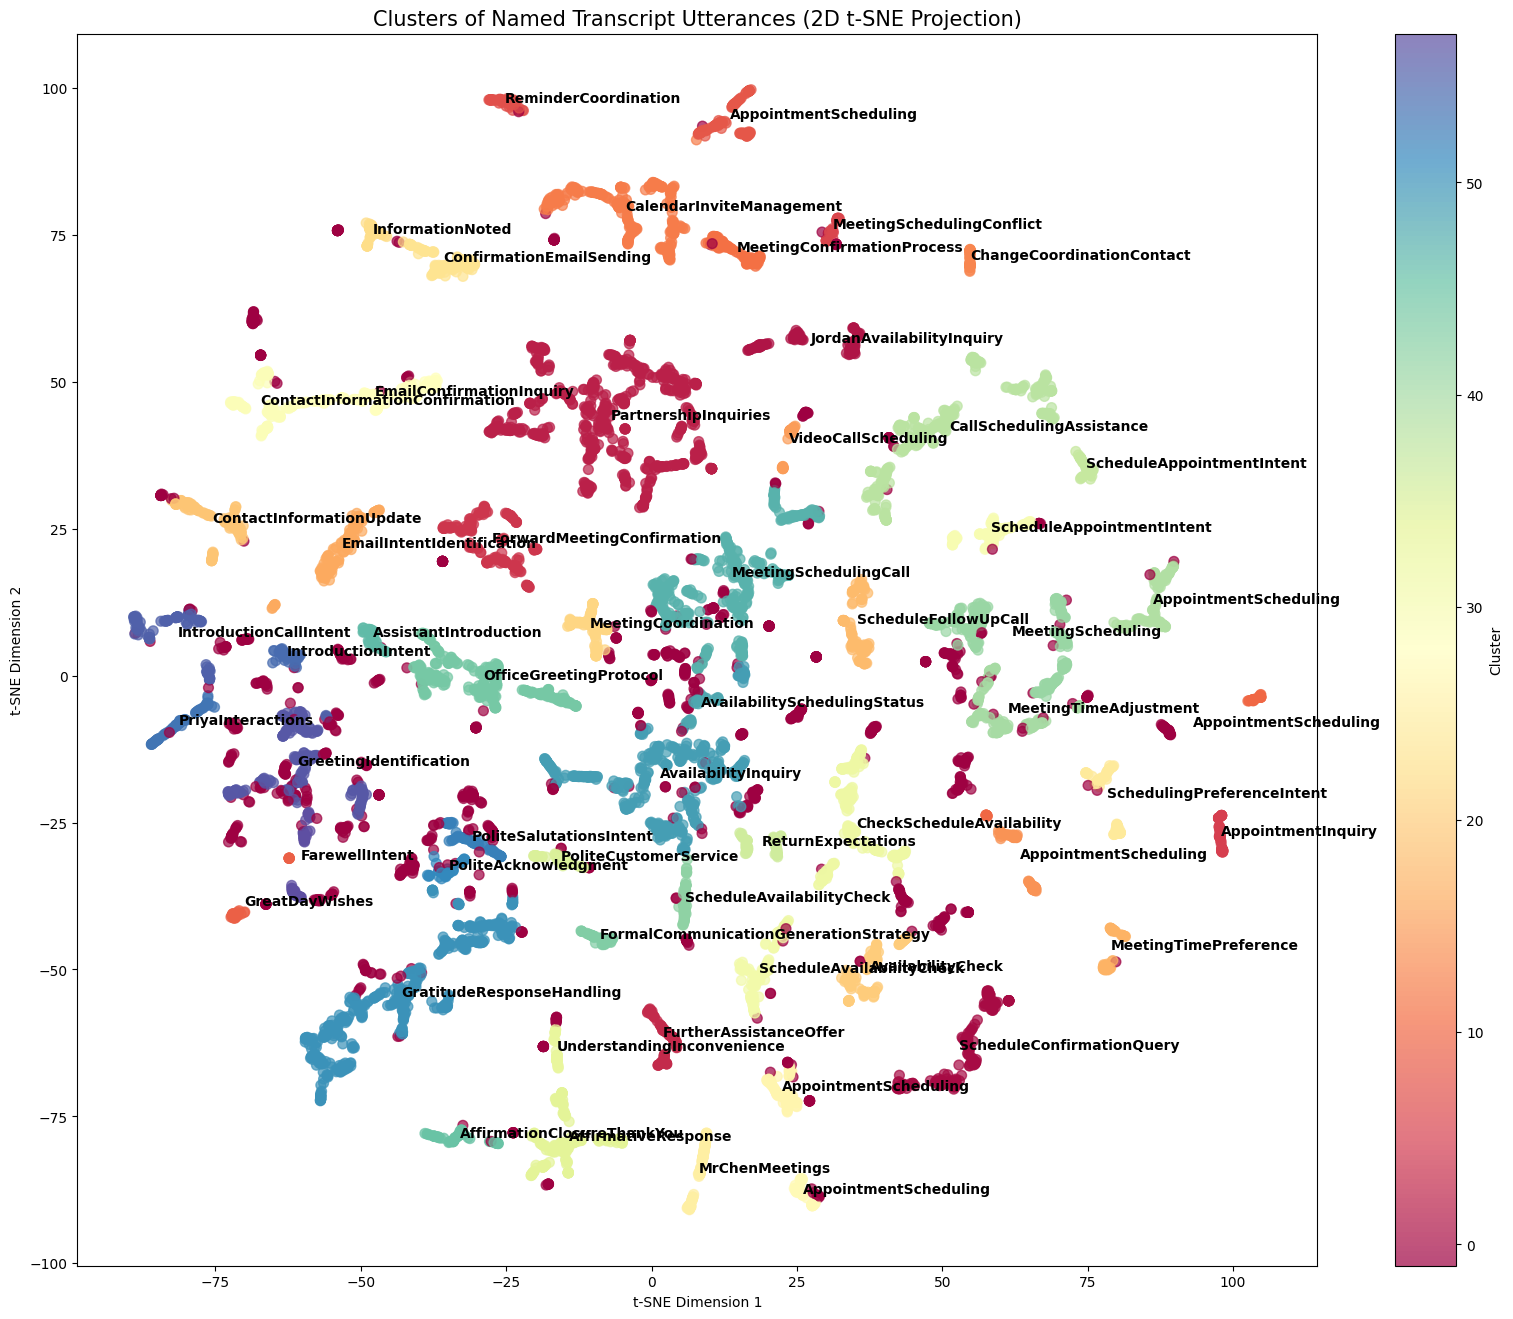

In [2]:
from tsdiscovery.openaiwrap import OpenAiWrap
from tsdiscovery.transcripts import Transcripts

from dotenv import load_dotenv
import os
from pathlib import Path

import logging.config

prj_root = os.getcwd() + '/..'

conf_dir = f"{prj_root}/conf"
env_conf = f"{conf_dir}/dev.env"

logger_conf = f"{conf_dir}/logging.conf"
logger_name = 'mainLogger'

logging.config.fileConfig(logger_conf)
log = logging.getLogger(logger_name)

env_path = Path(env_conf)
load_dotenv(dotenv_path=env_path)

openai_api_key = os.getenv('OPENAI_API_KEY')
openai_org = os.getenv('OPENAI_ORG')
openai_client = OpenAiWrap(
    openai_org,
    openai_api_key
)

utterance_csv_file = f'{prj_root}/output/combined_file.csv'
output_dir = f'{prj_root}/output/t6'

tss = Transcripts(openai_client)

tss.cluster_and_name_utterances(
    csv_file=utterance_csv_file,
    csv_col='utterance',
    output_dir=output_dir,
)

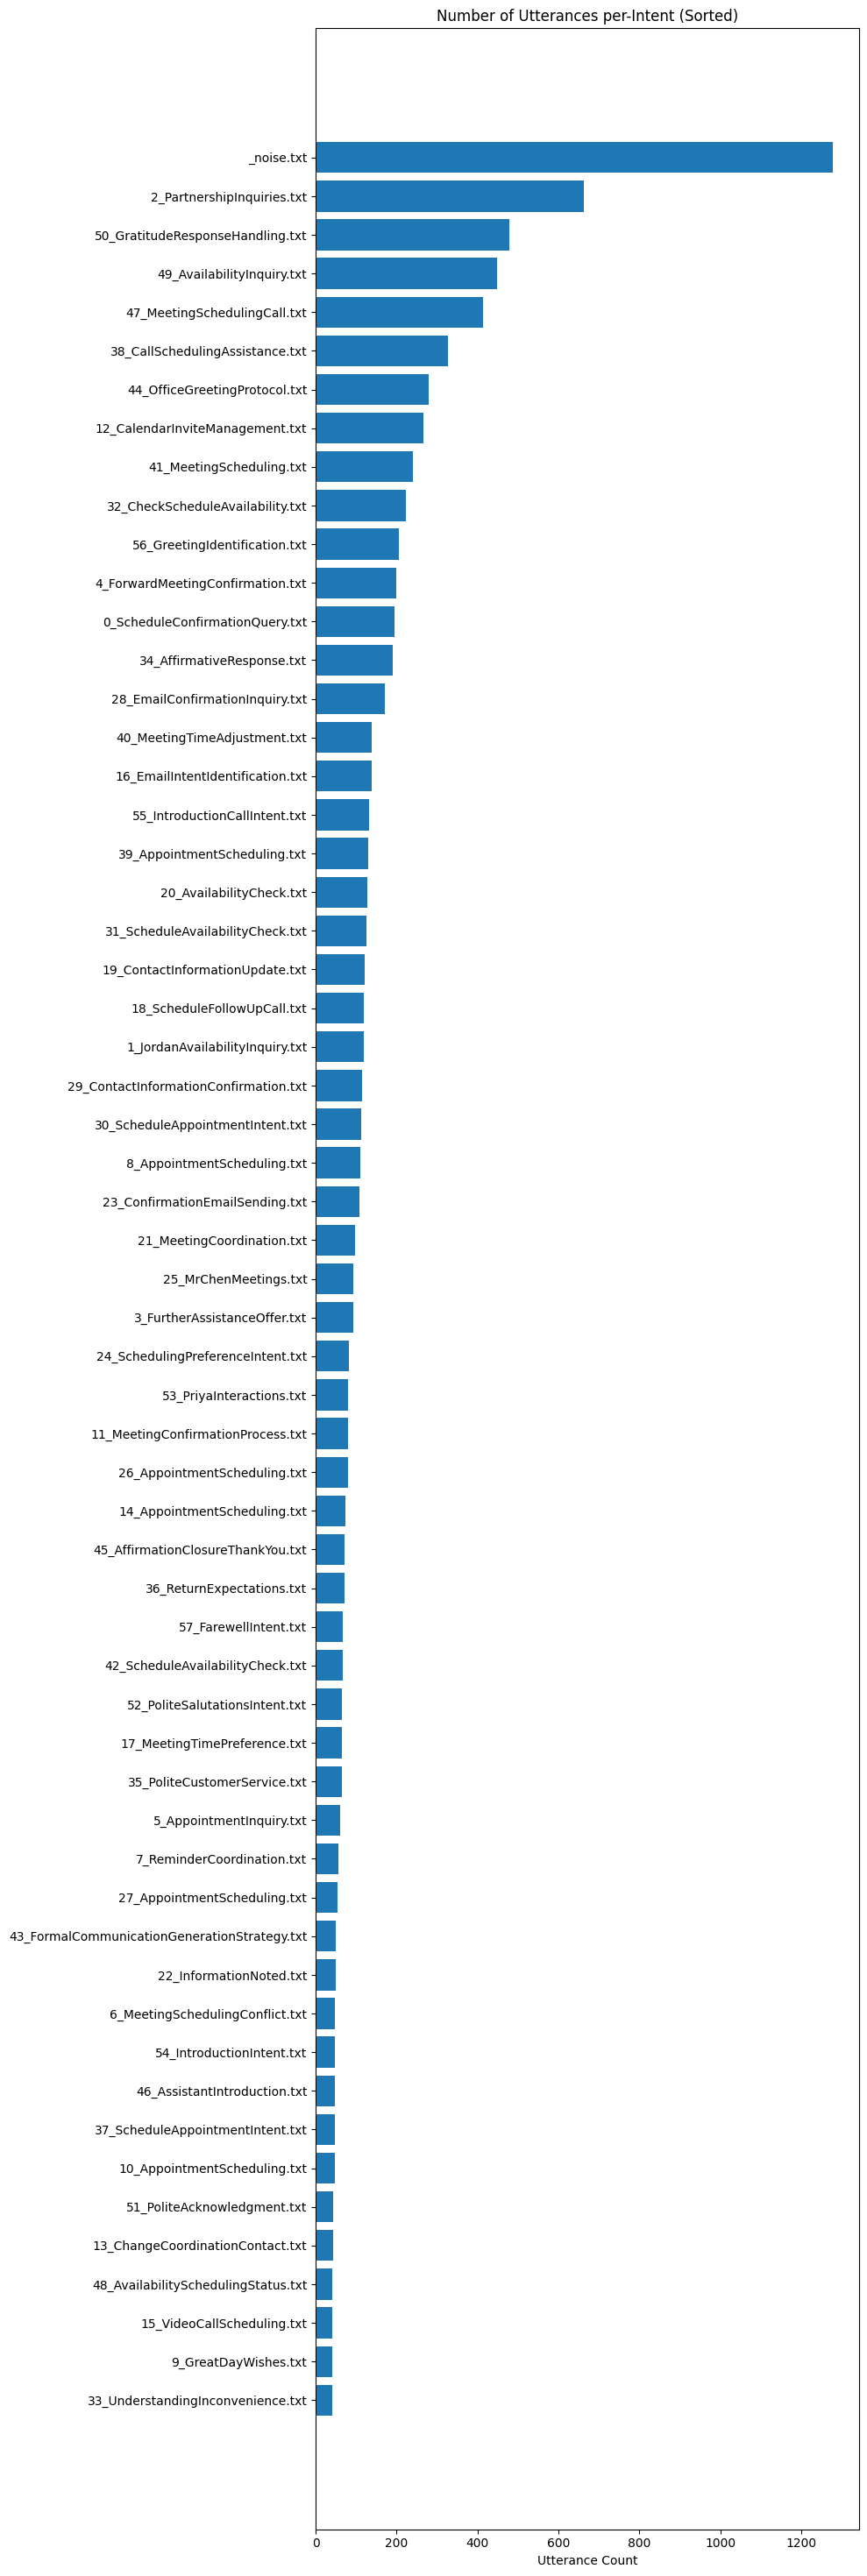

In [4]:
from tsdiscovery.transcripts import Transcripts
import os

prj_root = os.getcwd() + '/..'
graph_output_dir = f'{prj_root}/output/t6'

Transcripts.visualize_intent_bars(graph_output_dir)


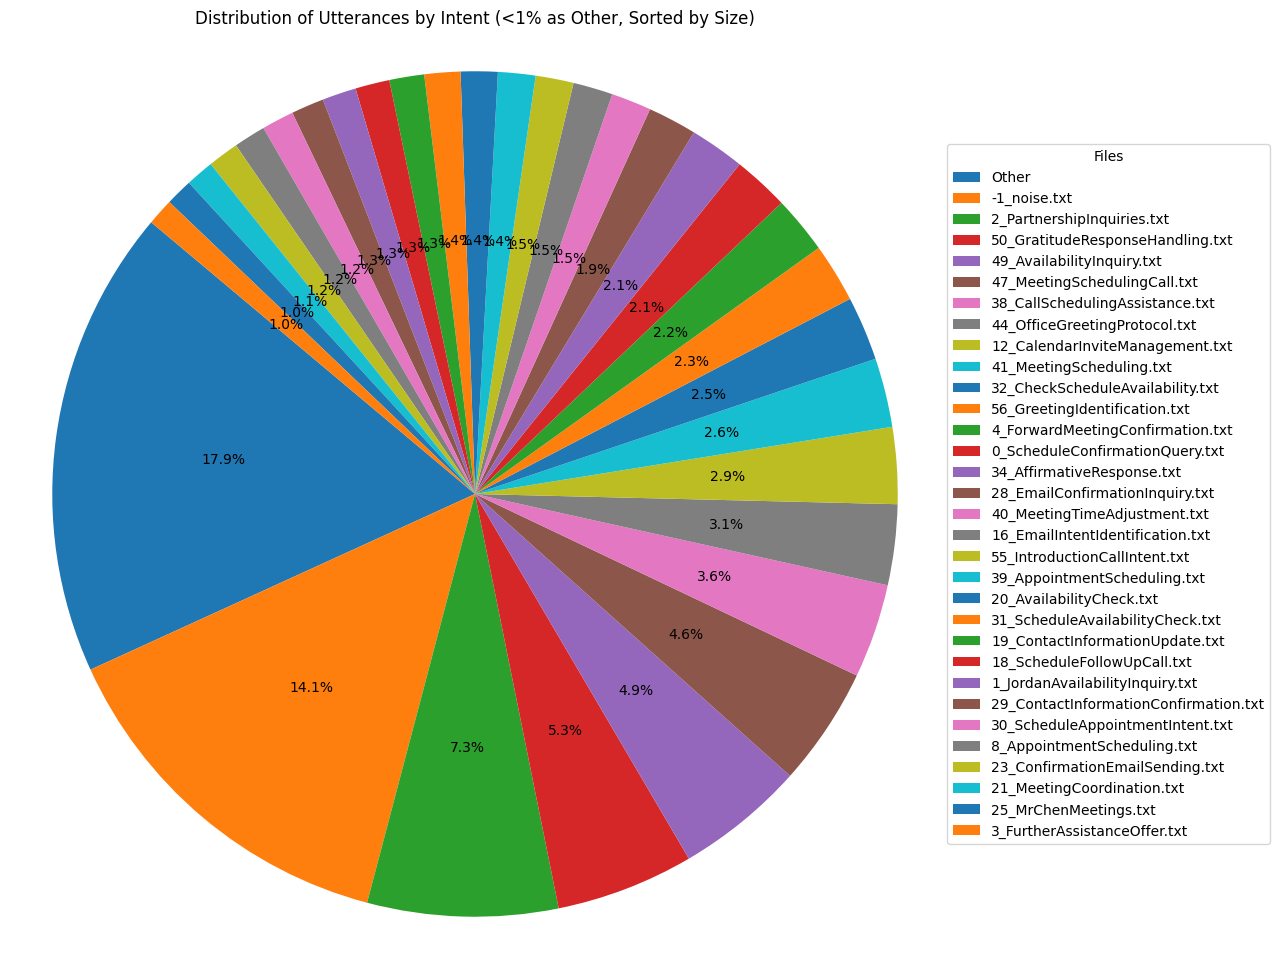

In [1]:
from tsdiscovery.transcripts import Transcripts
import os

prj_root = os.getcwd() + '/..'
graph_output_dir = f'{prj_root}/output/t6'

Transcripts.visualize_intent_pie(graph_output_dir)


In [4]:
from tsdiscovery.transcripts import Transcripts
import os

prj_root = os.getcwd() + '/..'
utterance_csv_file = f'{prj_root}/output/combined_file.csv'
ents_output_dir = f'{prj_root}/output/t8'

Transcripts.extract_entities(utterance_csv_file, ents_output_dir)


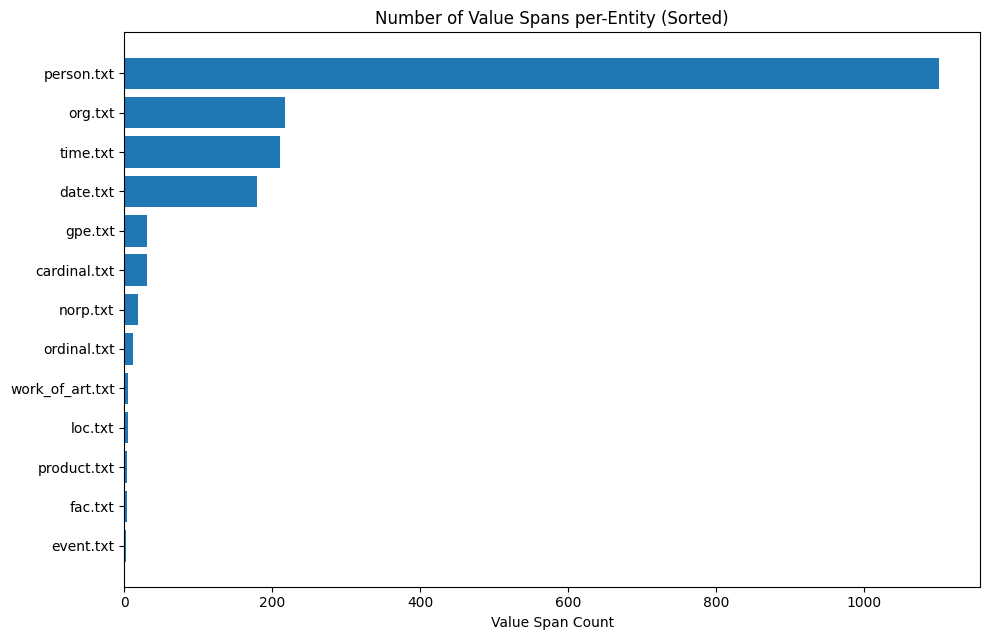

In [5]:
from tsdiscovery.transcripts import Transcripts
import os

prj_root = os.getcwd() + '/..'
graph_output_dir = f'{prj_root}/output/t8'

Transcripts.visualize_entity_bars(graph_output_dir)


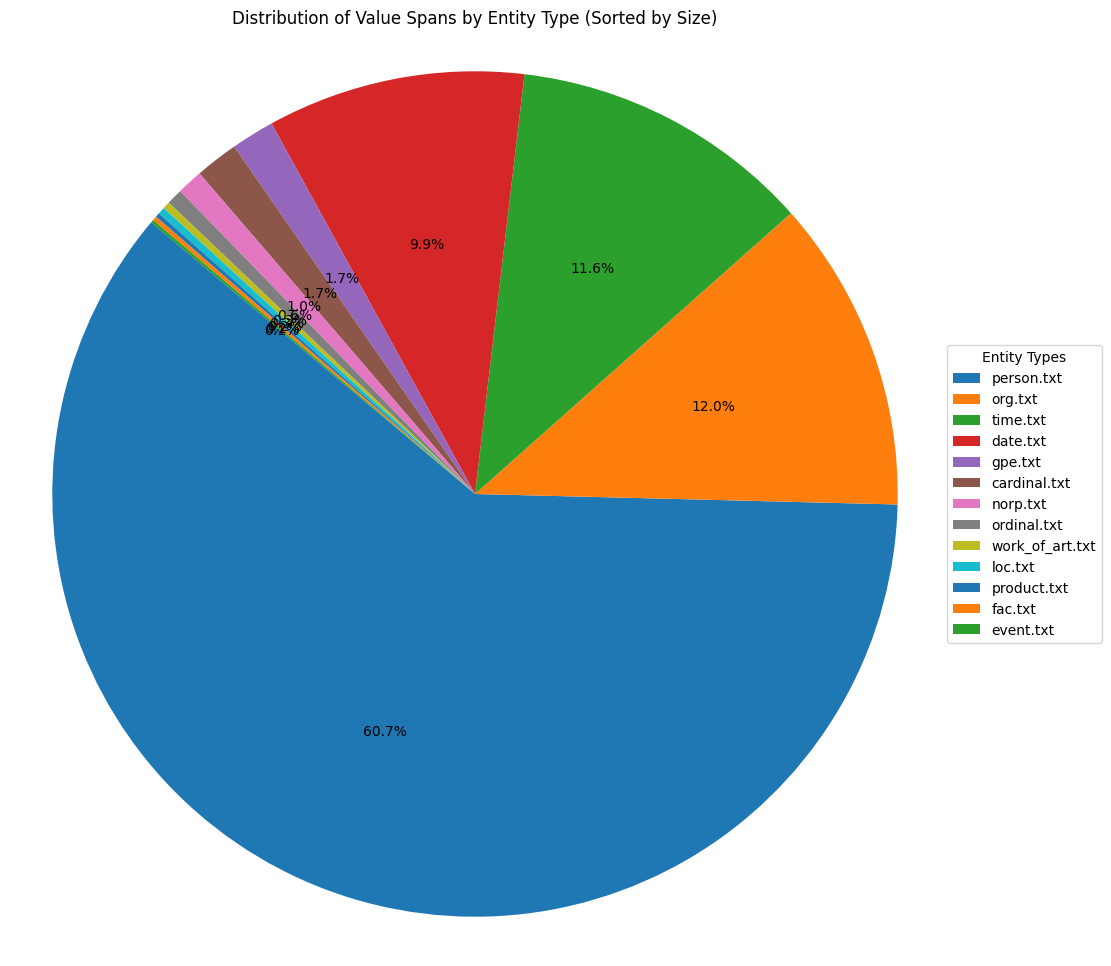

In [6]:
from tsdiscovery.transcripts import Transcripts
import os

prj_root = os.getcwd() + '/..'
graph_output_dir = f'{prj_root}/output/t8'

Transcripts.visualize_entity_pie(graph_output_dir)
